Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

Importing the Coronavirus data - dated between 1/22/2020 - 2/28/2020

In [2]:
data = pd.read_csv("coronavirus.csv")
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


Finding datatypes of the variables

In [3]:
data.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

Finding the missing values

In [4]:
print(data.isnull().sum())

SNo                  0
ObservationDate      0
Province/State     800
Country/Region       0
Last Update          0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64


Dropping the missing values

In [5]:
data = data.dropna()
data.count()

SNo                1899
ObservationDate    1899
Province/State     1899
Country/Region     1899
Last Update        1899
Confirmed          1899
Deaths             1899
Recovered          1899
dtype: int64

Dropping the unnecessary columns and storing the data in a new variable - Data

In [6]:
Data = data.drop(['SNo','Last Update'], axis=1)
Data.head()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0


Finding the duplicates in the dataframe

In [7]:
Data.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2624    False
2627    False
2632    False
2634    False
2635    False
2637    False
2641    False
2642    False
2644    False
2645    False
2653    False
2658    False
2659    False
2660    False
2661    False
2662    False
2670    False
2671    False
2678    False
2688    False
2689    False
2690    False
2691    False
2692    False
2693    False
2694    False
2695    False
2696    False
2697    False
2698    False
Length: 1899, dtype: bool

Detecting the outliers

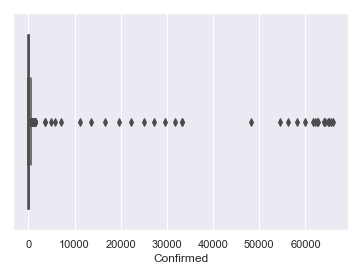

In [8]:
sns.boxplot(x=Data['Confirmed'])

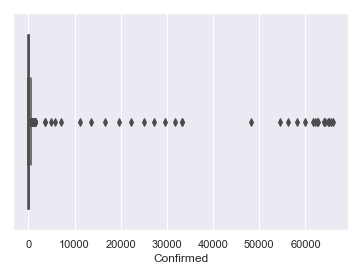

In [9]:
sns.boxplot(x=data['Confirmed'])

C:\Users\LATHA\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\LATHA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\LATHA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\LATHA\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\LATHA\Anaconda3\lib\si

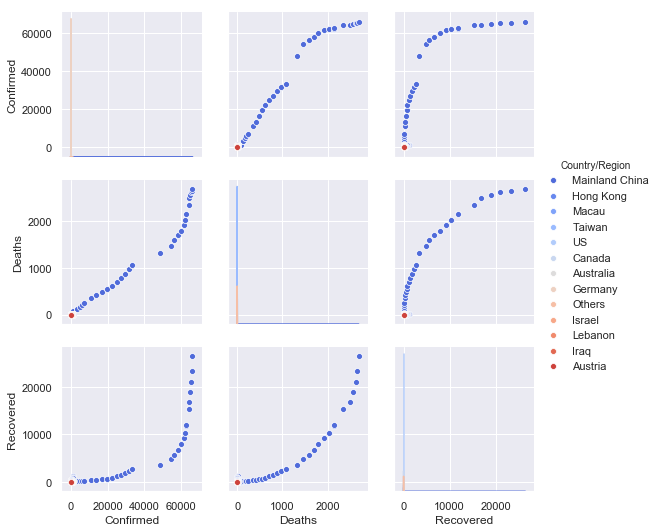

In [10]:
sns.pairplot(Data,hue='Country/Region',palette='coolwarm')

---

Studing the countrywise data with respect to:  
1) Number of patients diagnosed with coronavirus - Victims

2) Number of patients died due to coronavirus - Deaths

3) Number of patients recovered from coronavirus - Recovered

---

Getting started..

1) Number of patients diagnosed with coronavirus - Victims 

Grouping the data countrywise to see the total number of victims per country

In [11]:
countrywise_victims = Data.groupby(['Country/Region'])['Confirmed'].sum().nlargest(7).reset_index(name='Victims')
countrywise_victims

,Country/Region,Victims
0,Mainland China,1590181.0
1,Others,9371.0
2,Hong Kong,1513.0
3,US,685.0
4,Taiwan,629.0
5,Australia,494.0
6,Macau,319.0


Converting the columns in Countrywise victims data into array, to plot barplot

C:\Users\LATHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\LATHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Text(0, 0.5, 'Number of Victims')

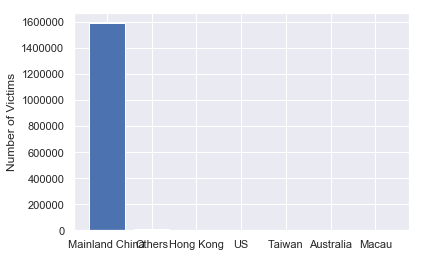

In [12]:
country_arrray = countrywise_victims[["Country/Region"]].as_matrix().ravel()
victims_array = countrywise_victims[["Victims"]].as_matrix().ravel()

x = np.arange(countrywise_victims.shape[0])
plt.bar(x, victims_array)
plt.xticks(x, country_arrray)
plt.ylabel("Number of Victims")

Pie chart for the sum of countrywise victims

([<matplotlib.patches.Wedge at 0x1f693c28d30>,
 [Text(-1.0996424870128643, 0.028042837876409234, 'Mainland China'),
  Text(1.0994144855870351, -0.03588577547434879, 'Others'),
  Text(1.0999297577291505, -0.012430931658269638, 'Hong Kong'),
  Text(1.099973096924771, -0.007693246501239386, 'US'),
  Text(1.099989259754592, -0.004860907790225565, 'Taiwan'),
  Text(1.0999972932713549, -0.0024402450068272737, 'Australia'),
  Text(1.0999997849754506, -0.0006877891849384742, 'Macau')])

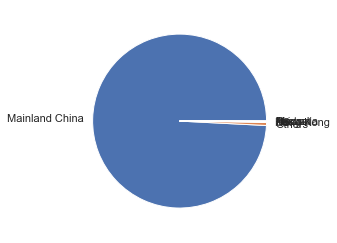

In [13]:
plt.pie(victims_array, labels=country_arrray)

Since Mainland China has very high number of victims, it's acting as an outlier, hence removing Mainland China to analyze other country's victims removing Mainland China, and storing it in a new variable

In [14]:
Except_China = Data.drop(Data[Data['Country/Region']=='Mainland China'].index)
Except_China = Except_China.drop(Except_China[Except_China['Country/Region']=='Others'].index)
Except_China

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
12,01/22/2020,Hong Kong,Hong Kong,0.0,0.0,0.0
20,01/22/2020,Macau,Macau,1.0,0.0,0.0
28,01/22/2020,Taiwan,Taiwan,1.0,0.0,0.0
31,01/22/2020,Washington,US,1.0,0.0,0.0
50,01/23/2020,Hong Kong,Hong Kong,2.0,0.0,0.0
58,01/23/2020,Macau,Macau,2.0,0.0,0.0
66,01/23/2020,Taiwan,Taiwan,1.0,0.0,0.0
69,01/23/2020,Washington,US,1.0,0.0,0.0
107,01/24/2020,Taiwan,Taiwan,3.0,0.0,0.0
109,01/24/2020,Hong Kong,Hong Kong,2.0,0.0,0.0


Grouping the data countrywise to see the total number of victims per country

In [15]:
Except_China_victims = Except_China.groupby(['Country/Region'])['Confirmed'].sum().nlargest(7).reset_index(name='Victims')
Except_China_victims

,Country/Region,Victims
0,Hong Kong,1513.0
1,US,685.0
2,Taiwan,629.0
3,Australia,494.0
4,Macau,319.0
5,Canada,226.0
6,Germany,17.0


Converting the columns in Countrywise victims data into array, to plot barplot

C:\Users\LATHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\LATHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Text(0, 0.5, 'Number of Victims')

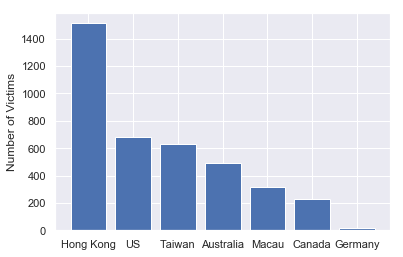

In [16]:
Except_China_arrray = Except_China_victims[["Country/Region"]].as_matrix().ravel()
victims_array = Except_China_victims[["Victims"]].as_matrix().ravel()

x = np.arange(Except_China_victims.shape[0])
plt.bar(x, victims_array)
plt.xticks(x, Except_China_arrray)
plt.ylabel("Number of Victims")

([<matplotlib.patches.Wedge at 0x1f6940d8860>,
 [Text(0.37375864105646284, 1.0345552079205953, 'Hong Kong'),
  Text(-1.0893663243179799, 0.1525811634571397, 'US'),
  Text(-0.6629398576884586, -0.8777874145190318, 'Taiwan'),
  Text(0.2846293564164667, -1.0625375896719835, 'Australia'),
  Text(0.8748287848229672, -0.6668392589261454, 'Macau'),
  Text(1.0757522194805815, -0.22968927332943287, 'Canada'),
  Text(1.099895956685575, -0.015128928141938383, 'Germany')])

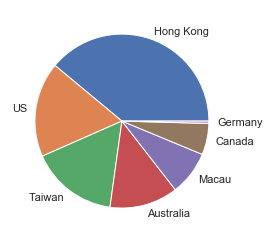

In [17]:
plt.pie(victims_array, labels=Except_China_arrray)

Since Mainland China is the lead cause for Coronavirus, analysing individual states in Mainland China by taking only Mainland China from main dataframe

In [18]:
Mainland_China = Data[Data['Country/Region'] == 'Mainland China']
Mainland_China

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0
5,01/22/2020,Guangdong,Mainland China,26.0,0.0,0.0
6,01/22/2020,Guangxi,Mainland China,2.0,0.0,0.0
7,01/22/2020,Guizhou,Mainland China,1.0,0.0,0.0
8,01/22/2020,Hainan,Mainland China,4.0,0.0,0.0
9,01/22/2020,Hebei,Mainland China,1.0,0.0,0.0


Grouping statewise victims of Mainland China

In [19]:
statewise_victims = Data.groupby(['Province/State'])['Confirmed'].sum().nlargest(7).reset_index(name='Victims')
statewise_victims

,Province/State,Victims
0,Hubei,1272734.0
1,Guangdong,34283.0
2,Zhejiang,31899.0
3,Henan,31269.0
4,Hunan,25824.0
5,Anhui,23887.0
6,Jiangxi,22739.0


C:\Users\LATHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\LATHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Text(0, 0.5, 'Number of Victims')

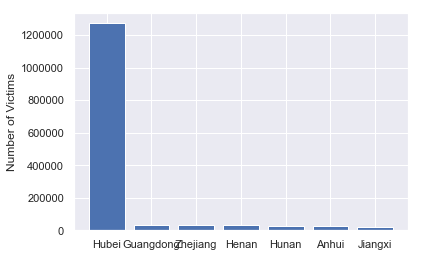

In [20]:
state_arrray = statewise_victims[["Province/State"]].as_matrix().ravel()
victims_array = statewise_victims[["Victims"]].as_matrix().ravel()

x = np.arange(statewise_victims.shape[0])
plt.bar(x, victims_array)
plt.xticks(x, state_arrray)
plt.ylabel("Number of Victims")

Removing Hubei since it's an Outlier

In [21]:
Except_Hubei = Mainland_China.drop(Mainland_China[Mainland_China['Province/State']=='Hubei'].index)
Except_Hubei

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0
5,01/22/2020,Guangdong,Mainland China,26.0,0.0,0.0
6,01/22/2020,Guangxi,Mainland China,2.0,0.0,0.0
7,01/22/2020,Guizhou,Mainland China,1.0,0.0,0.0
8,01/22/2020,Hainan,Mainland China,4.0,0.0,0.0
9,01/22/2020,Hebei,Mainland China,1.0,0.0,0.0


Grouping statewise victims of Mainland China except Hubei, since it's an outlier

In [22]:
statewise_victims = Except_Hubei.groupby(['Province/State'])['Confirmed'].sum().nlargest(7).reset_index(name='Victims')
statewise_victims

,Province/State,Victims
0,Guangdong,34283.0
1,Zhejiang,31899.0
2,Henan,31269.0
3,Hunan,25824.0
4,Anhui,23887.0
5,Jiangxi,22739.0
6,Shandong,15365.0


C:\Users\LATHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\LATHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Text(0, 0.5, 'Number of Victims')

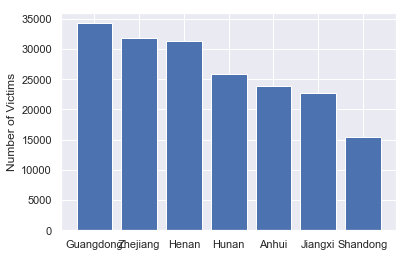

In [23]:
state_arrray = statewise_victims[["Province/State"]].as_matrix().ravel()
victims_array = statewise_victims[["Victims"]].as_matrix().ravel()

x = np.arange(statewise_victims.shape[0])
plt.bar(x, victims_array)
plt.xticks(x, state_arrray)
plt.ylabel("Number of Victims")

([<matplotlib.patches.Wedge at 0x1f6941dc748>,
 [Text(0.9192980654384961, 0.6040621382614859, 'Guangdong'),
  Text(-0.14566060573039416, 1.0903132522070227, 'Zhejiang'),
  Text(-1.026813861620644, 0.3945292049819651, 'Henan'),
  Text(-0.9070595362071723, -0.6222885165063146, 'Hunan'),
  Text(-0.13881698051841732, -1.0912056845158706, 'Anhui'),
  Text(0.6779959175791866, -0.8662110226416869, 'Jiangxi'),
  Text(1.062874012933255, -0.28337048652101915, 'Shandong')])

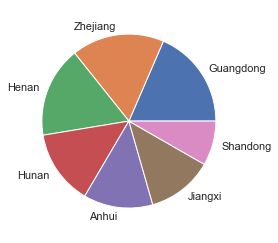

In [24]:
plt.pie(victims_array, labels=state_arrray)

1) It is observed that more than 85% of the victims are from Mainland China - 1590181 victims
   In Mainland China Hubei is the state with highest number of victims - 1272734, the remaining states have almost equal number    of victims per state

2) Next comes Hong Kong with 1513 Victims, and then US (685), Taiwan (629), Australia (494) etc.

---

2) Number of patients died due to coronavirus - Deaths

Grouping the data countrywise to see the total number of deaths per country

In [25]:
countrywise_deaths = Data.groupby(['Country/Region'])['Deaths'].sum().nlargest(7).reset_index(name='Deaths')
countrywise_deaths

,Country/Region,Deaths
0,Mainland China,44434.0
1,Hong Kong,35.0
2,Others,24.0
3,Taiwan,13.0
4,Australia,0.0
5,Austria,0.0
6,Canada,0.0


Removing China, since total number of deaths are also high in Mainland China (outlier)

In [26]:
Except_China_deaths = Except_China.groupby(['Country/Region'])['Deaths'].sum().nlargest(7).reset_index(name='Deaths')
Except_China_deaths

,Country/Region,Deaths
0,Hong Kong,35.0
1,Taiwan,13.0
2,Australia,0.0
3,Austria,0.0
4,Canada,0.0
5,Germany,0.0
6,Iraq,0.0


C:\Users\LATHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\LATHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Text(0, 0.5, 'Number of Deaths')

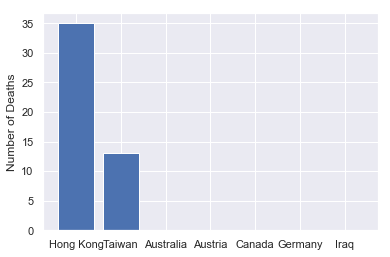

In [27]:
Except_China_arrray = Except_China_deaths[["Country/Region"]].as_matrix().ravel()
victims_array = Except_China_deaths[["Deaths"]].as_matrix().ravel()

x = np.arange(Except_China_deaths.shape[0])
plt.bar(x, victims_array)
plt.xticks(x, Except_China_arrray)
plt.ylabel("Number of Deaths")

([<matplotlib.patches.Wedge at 0x1f694281278>,
 [Text(-0.7252804482311112, 0.8270237429564392, 'Hong Kong'),
  Text(0.7252805256626593, -0.8270236750507791, 'Taiwan'),
  Text(1.0999999999999808, 2.0597886516129914e-07, 'Australia'),
  Text(1.0999999999999808, 2.0597886516129914e-07, 'Austria'),
  Text(1.0999999999999808, 2.0597886516129914e-07, 'Canada'),
  Text(1.0999999999999808, 2.0597886516129914e-07, 'Germany'),
  Text(1.0999999999999808, 2.0597886516129914e-07, 'Iraq')])

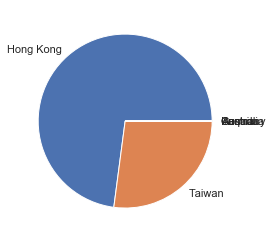

In [28]:
plt.pie(victims_array, labels=Except_China_arrray)

Analyzing statewise deaths in Mainland China

In [29]:
statewise_deaths = Mainland_China.groupby(['Province/State'])['Deaths'].sum().nlargest(10).reset_index(name='Deaths')
statewise_deaths

,Province/State,Deaths
0,Hubei,42735.0
1,Henan,329.0
2,Heilongjiang,246.0
3,Chongqing,113.0
4,Anhui,107.0
5,Hebei,100.0
6,Hainan,98.0
7,Beijing,90.0
8,Guangdong,82.0
9,Shandong,66.0


C:\Users\LATHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\LATHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Text(0, 0.5, 'Number of Deaths')

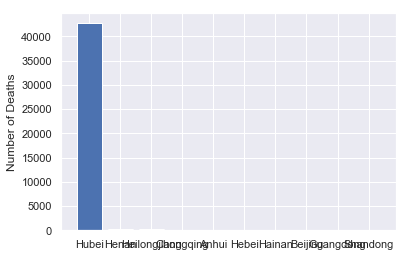

In [30]:
state_arrray = statewise_deaths[["Province/State"]].as_matrix().ravel()
victims_array = statewise_deaths[["Deaths"]].as_matrix().ravel()

x = np.arange(statewise_deaths.shape[0])
plt.bar(x, victims_array)
plt.xticks(x, state_arrray)
plt.ylabel("Number of Deaths")

([<matplotlib.patches.Wedge at 0x1f694336860>,
 [Text(-1.0957472966386324, 0.09663261307203355, 'Hubei'),
  Text(1.087248245908644, -0.16700674168600632, 'Henan'),
  Text(1.0931904936102261, -0.12220697476097844, 'Heilongjiang'),
  Text(1.0959653836210401, -0.09412692443922029, 'Chongqing'),
  Text(1.0973095926477108, -0.07688730638613434, 'Anhui'),
  Text(1.0983267741349847, -0.06064896716547313, 'Hebei'),
  Text(1.099074889630358, -0.04510417923004934, 'Hainan'),
  Text(1.099581612435905, -0.03033607741378655, 'Beijing'),
  Text(1.0998713963389504, -0.016819973704130017, 'Guangdong'),
  Text(1.0999877669662503, -0.005187728269902647, 'Shandong')])

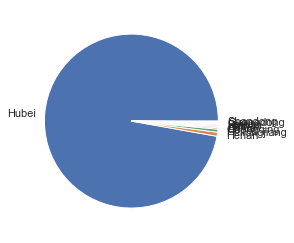

In [31]:
plt.pie(victims_array, labels=state_arrray)

In [32]:
statewise_deaths = Except_Hubei.groupby(['Province/State'])['Deaths'].sum().nlargest(7).reset_index(name='Deaths')
statewise_deaths

,Province/State,Deaths
0,Henan,329.0
1,Heilongjiang,246.0
2,Chongqing,113.0
3,Anhui,107.0
4,Hebei,100.0
5,Hainan,98.0
6,Beijing,90.0


C:\Users\LATHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\LATHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Text(0, 0.5, 'Number of Deaths')

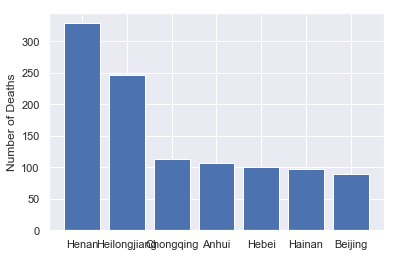

In [33]:
state_arrray = statewise_deaths[["Province/State"]].as_matrix().ravel()
victims_array = statewise_deaths[["Deaths"]].as_matrix().ravel()

x = np.arange(statewise_deaths.shape[0])
plt.bar(x, victims_array)
plt.xticks(x, state_arrray)
plt.ylabel("Number of Deaths")

([<matplotlib.patches.Wedge at 0x1f6943ebda0>,
 [Text(0.6359341835932787, 0.8975453827732336, 'Henan'),
  Text(-0.9550120754916909, 0.5458497372583898, 'Heilongjiang'),
  Text(-0.9534246893752323, -0.5486176826258355, 'Chongqing'),
  Text(-0.4389410133450107, -1.0086281707366969, 'Anhui'),
  Text(0.20774904110039302, -1.080203839986633, 'Hebei'),
  Text(0.7612883553264116, -0.7940025441044932, 'Hainan'),
  Text(1.062724581808478, -0.2839303844606907, 'Beijing')])

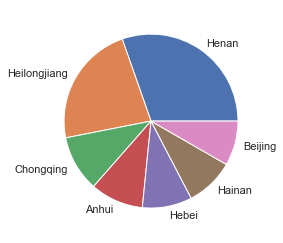

In [34]:
plt.pie(victims_array, labels=state_arrray)

1) Just like the victims rate, the death rate is also high in Mainland China - 44434 deaths, but that is just ~3% of victims.

   Hebei has highest number of victims as well as deaths (42735 deaths), whereas Henan has the 2nd highest number of deaths - 329

2) Although there are many other countries also effected with coronavirus, only Hong Kong and Taiwan had death count of 35 and 13 respectively.

---

3) Number of patients recovered from coronavirus - Recovered

Grouping the data countrywise to see the total number of recoveries per country

In [35]:
countrywise_Recovered = Data.groupby(['Country/Region'])['Recovered'].sum().nlargest(7).reset_index(name='Recovered')
countrywise_Recovered

,Country/Region,Recovered
0,Mainland China,338306.0
1,Australia,188.0
2,Hong Kong,159.0
3,Macau,97.0
4,US,81.0
5,Taiwan,54.0
6,Canada,39.0


Removing China, since total number of recoveries are also high in Mainland China (outlier)

In [36]:
Except_China_Recovered = Except_China.groupby(['Country/Region'])['Recovered'].sum().nlargest(7).reset_index(name='Recoveries')
Except_China_Recovered

,Country/Region,Recoveries
0,Australia,188.0
1,Hong Kong,159.0
2,Macau,97.0
3,US,81.0
4,Taiwan,54.0
5,Canada,39.0
6,Austria,0.0


C:\Users\LATHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\LATHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Text(0, 0.5, 'Number of Recoveries')

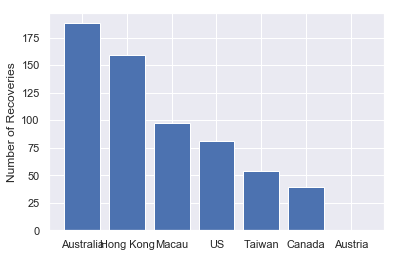

In [37]:
Except_China_arrray = Except_China_Recovered[["Country/Region"]].as_matrix().ravel()
victims_array = Except_China_Recovered[["Recoveries"]].as_matrix().ravel()

x = np.arange(Except_China_Recovered.shape[0])
plt.bar(x, victims_array)
plt.xticks(x, Except_China_arrray)
plt.ylabel("Number of Recoveries")

([<matplotlib.patches.Wedge at 0x1f69449e978>,
 [Text(0.6347455503907523, 0.8983863791594021, 'Australia'),
  Text(-1.0035306635915529, 0.4504733146719101, 'Hong Kong'),
  Text(-0.701338808847797, -0.8474218991765279, 'Macau'),
  Text(0.23307653596195724, -1.075023408295826, 'US'),
  Text(0.8615067050503691, -0.6839635934413881, 'Taiwan'),
  Text(1.0784527349916937, -0.21665571395404282, 'Canada'),
  Text(1.0999999999999954, -1.0298943298478347e-07, 'Austria')])

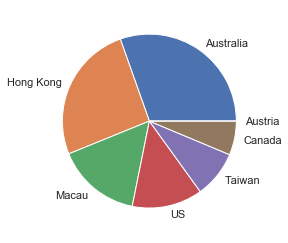

In [38]:
plt.pie(victims_array, labels=Except_China_arrray)

Analyzing statewise recoveries in Mainland China

In [39]:
statewise_Recoveries = Mainland_China.groupby(['Province/State'])['Recovered'].sum().nlargest(7).reset_index(name='Recoveries')
statewise_Recoveries

,Province/State,Recoveries
0,Hubei,223929.0
1,Henan,12492.0
2,Zhejiang,12138.0
3,Guangdong,11580.0
4,Hunan,11224.0
5,Anhui,8467.0
6,Jiangxi,8136.0


C:\Users\LATHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\LATHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Text(0, 0.5, 'Number of Recoveries')

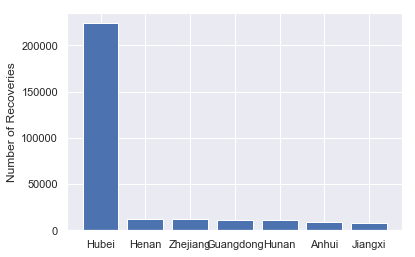

In [40]:
state_arrray = statewise_Recoveries[["Province/State"]].as_matrix().ravel()
victims_array = statewise_Recoveries[["Recoveries"]].as_matrix().ravel()

x = np.arange(statewise_Recoveries.shape[0])
plt.bar(x, victims_array)
plt.xticks(x, state_arrray)
plt.ylabel("Number of Recoveries")

([<matplotlib.patches.Wedge at 0x1f6945485f8>,
 [Text(-0.8423051052033603, 0.7074758722022655, 'Hubei'),
  Text(0.335400512730814, -1.0476194423834961, 'Henan'),
  Text(0.6014886045731659, -0.9209839621668914, 'Zhejiang'),
  Text(0.8171225352768845, -0.7364175190356872, 'Guangdong'),
  Text(0.9732894355197785, -0.512550167989038, 'Hunan'),
  Text(1.0601795368037932, -0.2932905551539201, 'Anhui'),
  Text(1.0956697169782994, -0.09750831398754418, 'Jiangxi')])

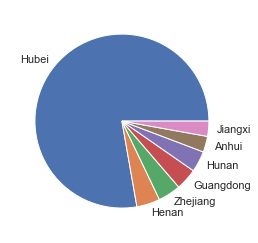

In [41]:
plt.pie(victims_array, labels=state_arrray)

1) Even the recovery rate is high in the Mainland China - 338306, which is ~21% of victim rate, which is ofcourse still bad.
   
   Henan Not only has more deaths, but also high recovery rate - 12492, ~40% of the victim rate.

2) Australia has the highest number of recovery rate, 188 ~38% of recovery rate w.r.t victim rate. 

   The USA has 12% of recovery    rate.

---

Bar plot for Top 6 Countries vs Patients (Except Mainland China)

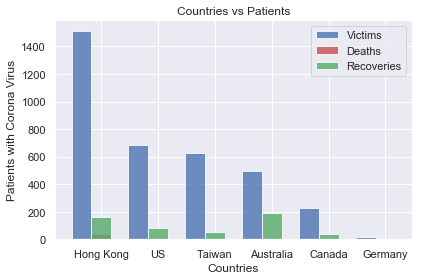

In [42]:
n_groups = 6
Victims = (1513,685,629,494,226,17)
Deaths = (35,0,13,0,0,0)
Recoveries = (159,81,54,188,39,0)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, Victims, bar_width,
alpha=opacity,
color='b',
label='Victims')
 
rects2 = plt.bar(index + bar_width, Deaths, bar_width,
alpha=opacity,
color='r',
label='Deaths')

rects3 = plt.bar(index + bar_width, Recoveries, bar_width,
alpha=opacity,
color='g',
label='Recoveries')
 
plt.xlabel('Countries')
plt.ylabel('Patients with Corona Virus')
plt.title('Countries vs Patients')
plt.xticks(index + bar_width, ('Hong Kong', 'US', 'Taiwan', 'Australia', 'Canada', 'Germany'))
plt.legend()
 
plt.tight_layout()
plt.show()

Country vs Patients (Mainland China)

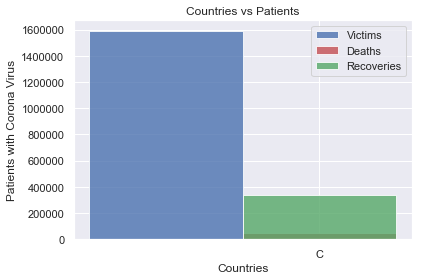

In [43]:
n_groups = 1
Victims = (1590181)
Deaths = (44434)
Recoveries = (338306)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, Victims, bar_width,
alpha=opacity,
color='b',
label='Victims')
 
rects2 = plt.bar(index + bar_width, Deaths, bar_width,
alpha=opacity,
color='r',
label='Deaths')

rects3 = plt.bar(index + bar_width, Recoveries, bar_width,
alpha=opacity,
color='g',
label='Recoveries')
 
plt.xlabel('Countries')
plt.ylabel('Patients with Corona Virus')
plt.title('Countries vs Patients')
plt.xticks(index + bar_width, ('China'))
plt.legend()
 
plt.tight_layout()
plt.show()

Conclusion

Mainland China, the place where the coronavirus is originated, has the highest number of victims - 1272734, which is more than 85% of the total victim rate among rest of the countries.

Among which Hubei has more number of people diagnosed with the virus, 1590181 ~2/3rd of Mainland China's victims.
Hubei has the highest number of deaths - 42735 ~2% of the victims rate and recoveries - 223929 ~ which is just 14% of the victims rate, which leaves us in a confusion of what's happening to the rest of the 84% of the patients diagnosed with the coronavirus in Hubei

Whereas Henan has the 2nd highest number of deaths - 329. Not only Henan has more deaths, but also high recovery rate - 12492, ~40% of the victim rate.

Coming to other countries, comparitively Australia has less number of victims and more number of recoveries, 188 recoveries, which is ~38% of recovery rate w.r.t victim rate.

Apart from Mainland China, as per the data, the only countries showing death records from 1/22/2020 until 2/28/2020 are Hong Kong and Taiwan, 35 & 13 respectively. Leaving to the conclusion that most of other countries like the USA, India, Australia, Canada, Germany, and Austria are comparitively at lo risk.
